# Assess the precision of the new Forward Euler implementation

In [1]:
import pandas as pd

In [12]:
df_ref = pd.read_csv("../TH2M/hp_slab_analytical_min_rel_perm_1e-5.csv")
df_new = pd.read_csv("hp_slab_analytical_fw_euler_new.csv")

In [13]:
df_ref

z    sL_eff        sL     pGR          xnCG        T      pCap  \
0   0.000000  0.729219  0.740050  101325  2.538320e-01  365.000   5555.00   
1   0.007919  0.721927  0.733049  101344  2.266920e-01  365.981   5573.64   
2   0.015277  0.714634  0.726049  101363  2.009720e-01  366.884   5592.53   
3   0.022088  0.707342  0.719048  101382  1.768100e-01  367.711   5611.69   
4   0.028369  0.700050  0.712048  101401  1.543150e-01  368.464   5631.10   
..       ...       ...       ...     ...           ...      ...       ...   
95  0.716491  0.036461  0.075002  103970  3.191010e-31  373.892  15078.50   
96  0.717388  0.029169  0.068002  103971  2.989280e-31  373.892  16242.80   
97  0.718648  0.021877  0.061002  103973  2.729280e-31  373.893  17877.40   
98  0.720643  0.014584  0.054001  103976  2.365790e-31  373.894  20464.50   
99  0.724743  0.007292  0.047001  103981  1.767370e-31  373.896  25783.20   

         eta     kRelG     kRelL      pVap     rhoGR  
0   0.043981  0.030005  0.314156   75605.4  0.694174  
1   0.052670  0.032401  0.302791   78370.9  0.682559  
2   0.063069  0.034917  0.291727   80993.8  0.671661  
3   0.075522  0.037553  0.280959   83460.0  0.661517  
4   0.090439  0.040313  0.270484   85758.2  0.652153  
..       ...       ...       ...       ...       ...  
95  0.995822  0.924684  0.000010  103986.0  0.602540  
96  0.995871  0.939907  0.000010  103987.0  0.602547  
97  0.995918  0.955087  0.000010  103989.0  0.602556  
98  0.995963  0.970197  0.000010  103991.0  0.602570  
99  0.996007  0.985197  0.000010  103997.0  0.602598  

[100 rows x 12 columns]

In [14]:
df_new

z    sL_eff        sL     pGR          xnCG        T      pCap  \
0   0.000000  0.729219  0.740050  101325  2.538320e-01  365.000   5555.00   
1   0.007919  0.721927  0.733049  101344  2.266920e-01  365.981   5573.64   
2   0.015277  0.714634  0.726049  101363  2.009720e-01  366.884   5592.53   
3   0.022088  0.707342  0.719048  101382  1.768100e-01  367.711   5611.69   
4   0.028369  0.700050  0.712048  101401  1.543150e-01  368.464   5631.11   
..       ...       ...       ...     ...           ...      ...       ...   
95  0.716491  0.036461  0.075002  103970  3.191010e-31  373.892  15078.60   
96  0.717388  0.029169  0.068002  103971  2.989280e-31  373.892  16242.90   
97  0.718648  0.021877  0.061002  103973  2.729280e-31  373.893  17877.60   
98  0.720643  0.014584  0.054001  103976  2.365790e-31  373.894  20464.80   
99  0.724743  0.007292  0.047001  103981  1.767370e-31  373.896  25784.00   

         eta     kRelG     kRelL      pVap     rhoGR  
0   0.043981  0.030005  0.314156   75605.4  0.694174  
1   0.052671  0.032401  0.302790   78371.2  0.682558  
2   0.063070  0.034917  0.291725   80994.1  0.671660  
3   0.075523  0.037553  0.280958   83460.2  0.661516  
4   0.090441  0.040313  0.270483   85758.5  0.652152  
..       ...       ...       ...       ...       ...  
95  0.995822  0.924685  0.000010  103986.0  0.602540  
96  0.995871  0.939908  0.000010  103987.0  0.602547  
97  0.995918  0.955088  0.000010  103989.0  0.602556  
98  0.995963  0.970199  0.000010  103991.0  0.602570  
99  0.996007  0.985199  0.000010  103997.0  0.602598  

[100 rows x 12 columns]

# Relative errors between abstract forward Euler implementation and the old more ad hoc implementation

In [25]:
res = abs((df_ref - df_new) / df_ref).max()
with pd.option_context('display.float_format', '{:0.2g}'.format):
    print(res)

z              0
sL_eff         0
sL             0
pGR            0
xnCG           0
T              0
pCap     3.1e-05
eta      2.3e-05
kRelG    9.7e-06
kRelL    5.8e-05
pVap     3.8e-06
rhoGR    1.7e-06
dtype: float64


# Runge-Kutta

In [67]:
df_rk4 = pd.read_csv("hp_slab_analytical_rk4.csv")
df_fwde = df_new

In [68]:
df_rk4.tail(10)

z        sL_eff        sL           pGR          xnCG  \
98   7.206430e-01  1.458440e-02  0.054001  1.039760e+05  2.374390e-31   
99   7.247430e-01  7.292190e-03  0.047001  1.039810e+05  1.773780e-31   
100  9.405090e-01  4.375310e-06  0.040004  1.042650e+05  4.605400e-38   
101  9.552740e-01  3.646090e-06  0.040003  1.042850e+05  1.670840e-38   
102  9.746100e-01  2.916870e-06  0.040003  1.043100e+05  4.798250e-39   
103  1.001760e+00  2.187660e-06  0.040002  1.043460e+05  1.429000e-39   
104  1.044740e+00  1.458440e-06  0.040001  1.044020e+05  1.861470e-39   
105  1.133380e+00  7.292190e-07  0.040001  1.045190e+05  5.714450e-38   
106  1.358760e+11  1.972020e-16  0.040000  1.777260e+14  7.003980e-22   
107  1.358760e+11  1.110220e-16  0.040000  1.777260e+14  7.003980e-22   

                T          pCap       eta     kRelG    kRelL          pVap  \
98   3.738940e+02  2.046480e+04  0.995963  0.970199  0.00001  1.039910e+05   
99   3.738960e+02  2.578400e+04  0.996007  0.985199  0.00001  1.039970e+05   
100  3.740210e+02  3.057030e+05  0.996060  0.999991  0.00001  1.042810e+05   
101  3.740290e+02  3.248580e+05  0.996061  0.999993  0.00001  1.043000e+05   
102  3.740400e+02  3.499430e+05  0.996062  0.999994  0.00001  1.043260e+05   
103  3.740560e+02  3.851620e+05  0.996064  0.999996  0.00001  1.043620e+05   
104  3.740810e+02  4.409010e+05  0.996066  0.999997  0.00001  1.044180e+05   
105  3.741320e+02  5.555000e+05  0.996070  0.999999  0.00001  1.045350e+05   
106  5.631440e+10  8.590130e+08  0.000006  1.000000  0.00001  5.013380e+10   
107  5.631440e+10  1.040320e+09  0.000006  1.000000  0.00001  5.013380e+10   

        rhoGR  
98   0.602570  
99   0.602598  
100  0.604044  
101  0.604142  
102  0.604272  
103  0.604453  
104  0.604740  
105  0.605332  
106  6.838400  
107  6.838400

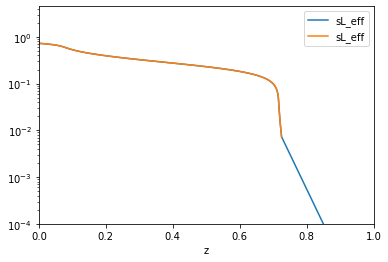

In [69]:
res = df_rk4.plot("z", "sL_eff")
df_fwde.plot("z", "sL_eff", ax=res)

res.set_yscale("log")
res.set_ylim(1e-4)
res.set_xlim(0,1)
res;

In [70]:
df_rk4_2 = pd.read_csv("hp_slab_analytical_rk4_2.csv")
df_fwe_2 = pd.read_csv("hp_slab_analytical_fwe_2.csv")

In [71]:
df_rk4_2.tail(10)

z        sL_eff        sL     pGR          xnCG             T  \
230  7.172400e-01  5.833750e-06  0.040006  103971  3.099900e-31  3.739350e+02   
231  7.172540e-01  5.104530e-06  0.040005  103971  3.099900e-31  3.739370e+02   
232  7.172720e-01  4.375310e-06  0.040004  103971  3.099900e-31  3.739400e+02   
233  7.172930e-01  3.646090e-06  0.040003  103971  3.099900e-31  3.739430e+02   
234  7.173220e-01  2.916870e-06  0.040003  103971  3.099900e-31  3.739470e+02   
235  7.173620e-01  2.187660e-06  0.040002  103971  3.099900e-31  3.739530e+02   
236  7.174250e-01  1.458440e-06  0.040001  103971  3.099900e-31  3.739620e+02   
237  7.175550e-01  7.292190e-07  0.040001  103971  3.099900e-31  3.739810e+02   
238  1.450230e+08  1.972020e-16  0.040000  103971  3.099900e-31  2.117750e+10   
239  1.450230e+08  1.110220e-16  0.040000  103971  3.099900e-31  2.117750e+10   

             pCap           eta     kRelG         kRelL          pVap  \
230  2.777500e+05  4.360780e-12  0.999988  6.433910e-20  1.039860e+05   
231  2.903920e+05  2.672560e-12  0.999990  3.943100e-20  1.039860e+05   
232  3.057030e+05  1.518640e-12  0.999991  2.240610e-20  1.039860e+05   
233  3.248580e+05  7.782590e-13  0.999993  1.148250e-20  1.039860e+05   
234  3.499430e+05  3.433900e-13  0.999994  5.066390e-21  1.039860e+05   
235  3.851620e+05  1.195860e-13  0.999996  1.764370e-21  1.039860e+05   
236  4.409010e+05  2.704030e-14  0.999997  3.989530e-22  1.039860e+05   
237  5.555000e+05  2.129290e-15  0.999999  3.141560e-23  1.039860e+05   
238  8.590130e+08  4.291880e-58  1.000000  2.598220e-58  5.013380e+10   
239  1.040320e+09  5.525410e-59  1.000000  3.161090e-59  5.013380e+10   

            rhoGR  
230  6.024740e-01  
231  6.024700e-01  
232  6.024660e-01  
233  6.024610e-01  
234  6.024540e-01  
235  6.024450e-01  
236  6.024300e-01  
237  6.024000e-01  
238  1.063800e-08  
239  1.063800e-08

In [72]:
df_fwe_2.tail(10)

z        sL_eff        sL     pGR          xnCG        T  \
229  0.717222  6.562970e-06  0.040006  103971  3.088640e-31  373.933   
230  0.717234  5.833750e-06  0.040006  103971  3.088640e-31  373.934   
231  0.717247  5.104530e-06  0.040005  103971  3.088640e-31  373.936   
232  0.717262  4.375310e-06  0.040004  103971  3.088640e-31  373.939   
233  0.717282  3.646090e-06  0.040003  103971  3.088640e-31  373.941   
234  0.717306  2.916870e-06  0.040003  103971  3.088640e-31  373.945   
235  0.717339  2.187660e-06  0.040002  103971  3.088640e-31  373.950   
236  0.717388  1.458440e-06  0.040001  103971  3.088640e-31  373.957   
237  0.717471  7.292190e-07  0.040001  103971  3.088640e-31  373.969   
238  0.717681  1.110220e-16  0.040000  103971  3.088640e-31  374.000   

             pCap           eta     kRelG         kRelL        pVap     rhoGR  
229  2.670570e+05  6.716210e-12  0.999987  9.909110e-20  103983.000  0.602478  
230  2.777500e+05  4.360790e-12  0.999988  6.433910e-20  103983.000  0.602475  
231  2.903920e+05  2.672570e-12  0.999990  3.943100e-20  103982.000  0.602472  
232  3.057030e+05  1.518650e-12  0.999991  2.240610e-20  103981.000  0.602468  
233  3.248580e+05  7.782630e-13  0.999993  1.148250e-20  103980.000  0.602464  
234  3.499430e+05  3.433920e-13  0.999994  5.066390e-21  103978.000  0.602458  
235  3.851620e+05  1.195870e-13  0.999996  1.764370e-21  103974.000  0.602450  
236  4.409010e+05  2.704070e-14  0.999997  3.989530e-22  103967.000  0.602439  
237  5.555000e+05  2.129360e-15  0.999999  3.141560e-23  103942.000  0.602419  
238  1.040320e+09  3.128720e-51  1.000000  3.161090e-59     251.797  0.602370

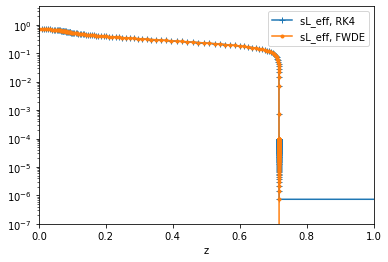

In [83]:
res = df_rk4_2.plot("z", "sL_eff", marker="+", label="sL_eff, RK4")
df_fwe_2.plot("z", "sL_eff", ax=res, marker=".", label="sL_eff, FWDE")

res.set_yscale("log")
res.set_ylim(1e-7)
res.set_xlim(0,1)
res;

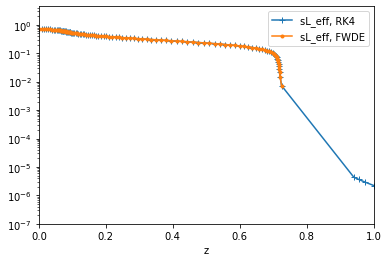

In [85]:
df_rk4 = pd.read_csv("hp_slab_analytical_rk4.csv")
df_fwe = pd.read_csv("hp_slab_analytical_fw_euler_new.csv")

res = df_rk4.plot("z", "sL_eff", marker="+", label="sL_eff, RK4")
df_fwe.plot("z", "sL_eff", ax=res, marker=".", label="sL_eff, FWDE")

res.set_yscale("log")
res.set_ylim(1e-7)
res.set_xlim(0,1)
res;

# Min Rel Perm = 1e-5

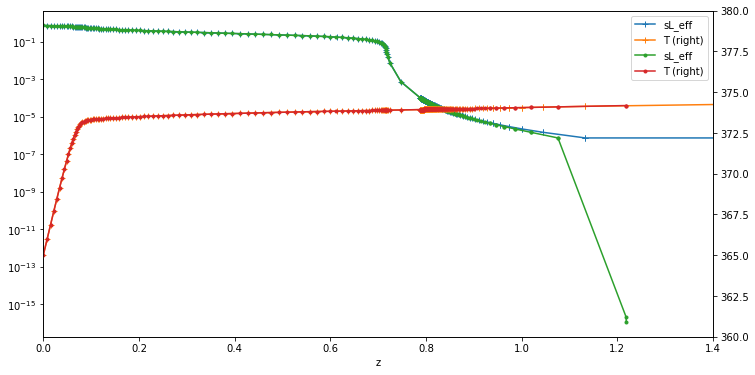

In [105]:
df_rk4 = pd.read_csv("hp_ana_rk4_min_rel_perm_1e-5.csv")
df_fwe = pd.read_csv("hp_ana_fwe_min_rel_perm_1e-5.csv")

#res = df_rk4.plot("z", ["sL_eff", "T"], marker="+", label=["sL_eff, RK4", "T, RK4"], secondary_y=["T"])
#df_fwe.plot("z", ["sL_eff", "T"], ax=res, marker=".", label=["sL_eff, FWDE", "T, RK4"], secondary_y=["T"])
res = df_rk4.plot("z", ["sL_eff", "T"], marker="+", secondary_y=["T"])
df_fwe.plot("z", ["sL_eff", "T"], ax=res, marker=".", secondary_y=["T"])

res.set_yscale("log")
#res.set_ylim(1e-7)
res.set_xlim(0,1.4)
res.right_ax.set_ylim(360, 380)
res.figure.set_size_inches(12,6)
res;

* Fading out of sL_eff in the semilog plot at the right end of the domain can be attributed to the minimum relative permeability set.
* For extremely low sL both fwd Euler and Runge-Kutta become "unstable", maybe because of numerical errors due to limited floating point precision.